In [12]:
import pandas as pd
from pathlib import Path

COMMON_DATA_DIR=Path("..","..","common","data")
RAWDF_DIR=COMMON_DATA_DIR/"rawdf"

#データ加工

In [13]:
df=pd.read_csv(RAWDF_DIR/"results.csv",sep="\t")

In [14]:
df.iloc[:,0:10]

,race_id,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差
0,202309020109,1,7,7,キミノナハマリア,牝3,54.0,松山弘平,1:47.0,NaN
1,202309020109,2,3,3,ランスオブサウンド,牝3,54.0,団野大成,1:47.5,3
2,202309020109,3,2,2,アリスヴェリテ,牝3,54.0,藤岡康太,1:47.5,ハナ
3,202309020109,4,8,10,メテオリート,牝3,54.0,吉田隼人,1:47.5,アタマ
4,202309020109,5,8,9,サーマルソアリング,牝3,54.0,岩田望来,1:47.6,1/2
...,...,...,...,...,...,...,...,...,...,...
47667,202306050608,11,1,1,トゥピ,牝3,55.0,北村宏司,1:56.7,1/2
47668,202306050608,12,3,4,サイモンルグラン,牡6,57.0,横山琉人,1:57.0,1.3/4
47669,202306050608,13,2,2,テンナイトパール,牝7,56.0,勝浦正樹,1:57.2,1
47670,202306050608,14,8,15,ワタシデイイデスカ,牝3,55.0,内田博幸,1:57.5,1.3/4


In [15]:
df["着順"]

0         1
1         2
2         3
3         4
4         5
         ..
47667    11
47668    12
47669    13
47670    14
47671    15
Name: 着順, Length: 47672, dtype: object

In [16]:
df["rank"]=pd.to_numeric(df["着順"],errors="coerce")
df["rank"].value_counts(dropna=False)

rank
3.0     3460
1.0     3459
2.0     3456
4.0     3456
5.0     3456
6.0     3443
7.0     3424
8.0     3367
9.0     3259
10.0    3101
11.0    2895
12.0    2637
13.0    2342
14.0    2047
15.0    1708
16.0    1279
NaN      399
17.0     280
18.0     204
Name: count, dtype: int64

In [17]:
df.dropna(subset=["rank"],inplace=True)

In [18]:
df["rank"].value_counts(dropna=False)

rank
3.0     3460
1.0     3459
2.0     3456
4.0     3456
5.0     3456
6.0     3443
7.0     3424
8.0     3367
9.0     3259
10.0    3101
11.0    2895
12.0    2637
13.0    2342
14.0    2047
15.0    1708
16.0    1279
17.0     280
18.0     204
Name: count, dtype: int64

In [19]:
df["馬番"].astype(int)

0         7
1         3
2         2
3        10
4         9
         ..
47667     1
47668     4
47669     2
47670    15
47671     5
Name: 馬番, Length: 47273, dtype: int64

In [20]:
df["性齢"].str[0]

0        牝
1        牝
2        牝
3        牝
4        牝
        ..
47667    牝
47668    牡
47669    牝
47670    牝
47671    牝
Name: 性齢, Length: 47273, dtype: object

In [21]:
sex_mapping={"牡":0,"牝":1,"セ":2}

In [22]:
df["性齢"].str[0].map(sex_mapping)

0        1
1        1
2        1
3        1
4        1
        ..
47667    1
47668    0
47669    1
47670    1
47671    1
Name: 性齢, Length: 47273, dtype: int64

In [23]:
df["性齢"].str[1:].astype(int)

0        3
1        3
2        3
3        3
4        3
        ..
47667    3
47668    6
47669    7
47670    3
47671    4
Name: 性齢, Length: 47273, dtype: int64

In [24]:
df["斤量"]

0        54.0
1        54.0
2        54.0
3        54.0
4        54.0
         ... 
47667    55.0
47668    57.0
47669    56.0
47670    55.0
47671    54.0
Name: 斤量, Length: 47273, dtype: float64

In [25]:
df.iloc[:,10:20]

,ﾀｲﾑ指数,通過,上り,単勝,人気,馬体重,調教ﾀｲﾑ,厩舎ｺﾒﾝﾄ,備考,調教師
0,**,2-3,34.5,3.0,1.0,490(+4),NaN,NaN,NaN,[西] 千田輝彦
1,**,1-1,35.2,6.2,4.0,430(+2),NaN,NaN,NaN,[西] 奥村豊
2,**,7-7,34.5,5.2,3.0,438(-4),NaN,NaN,NaN,[西] 中竹和也
3,**,7-7,34.5,14.2,7.0,470(-12),NaN,NaN,NaN,[西] 吉岡辰弥
4,**,5-4,34.9,8.2,5.0,462(-6),NaN,NaN,NaN,[西] 藤原英昭
...,...,...,...,...,...,...,...,...,...,...
47667,**,13-13-13-13,39.2,88.3,12.0,468(0),NaN,NaN,NaN,[東] 田村康仁
47668,**,14-14-13-13,39.6,176.5,13.0,508(+10),NaN,NaN,NaN,[東] 勢司和浩
47669,**,15-14-15-15,39.3,269.1,15.0,494(-4),NaN,NaN,NaN,[東] 小西一男
47670,**,3-3-4-7,41.0,38.9,9.0,512(+4),NaN,NaN,NaN,[東] 本間忍


In [26]:
df["上り"]

0        34.5
1        35.2
2        34.5
3        34.5
4        34.9
         ... 
47667    39.2
47668    39.6
47669    39.3
47670    41.0
47671    43.3
Name: 上り, Length: 47273, dtype: float64

In [27]:
df["上り"].value_counts(dropna=False)

上り
35.5    793
35.8    781
36.9    779
35.7    768
36.5    763
       ... 
15.0      1
48.8      1
48.4      1
58.4      1
49.5      1
Name: count, Length: 213, dtype: int64

In [28]:
df["人気"].astype(int)

0         1
1         4
2         3
3         7
4         5
         ..
47667    12
47668    13
47669    15
47670     9
47671    14
Name: 人気, Length: 47273, dtype: int64

In [29]:
df["weight"]=df["馬体重"].str.extract(r"(\d+)").astype(int)
df["weight"]

0        490
1        430
2        438
3        470
4        462
        ... 
47667    468
47668    508
47669    494
47670    512
47671    406
Name: weight, Length: 47273, dtype: int64

In [30]:
df["weight_df"]=df["馬体重"].str.extract(r"\((.)+\)").astype(int)
df["weight_df"]

0        4
1        2
2        4
3        2
4        6
        ..
47667    0
47668    0
47669    4
47670    4
47671    0
Name: weight_df, Length: 47273, dtype: int64

In [31]:
df=pd.read_csv(RAWDF_DIR/ "horse_results.csv",sep="\t")

In [82]:
df

,horse_id,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番,...,着差,ﾀｲﾑ指数,通過,ペース,上り,馬体重,厩舎ｺﾒﾝﾄ,備考,勝ち馬(2着馬),賞金
0,2020105144,2024/12/28,7京都9,晴,9.0,春待月賞(2勝クラス),NaN,16,5.0,10,...,-0.4,**,9-8,35.5-36.7,36.0,492(-6),NaN,NaN,(アンジュフィールド),1589.9
1,2020105144,2024/10/26,4東京7,曇,12.0,3歳以上2勝クラス,NaN,14,8.0,14,...,0.9,**,5-7,36.1-35.9,36.2,498(+2),NaN,NaN,スタンリーテソーロ,NaN
2,2020105144,2024/10/05,4東京1,小雨,12.0,3歳以上2勝クラス,NaN,16,4.0,7,...,0.3,**,14-13,35.7-35.0,34.2,496(+12),NaN,NaN,ベルウェザー,114.0
3,2020105144,2024/06/30,2福島2,曇,10.0,いわき特別(2勝クラス),NaN,13,4.0,4,...,0.5,**,5-5-2-2,29.9-37.1,37.4,484(-14),NaN,NaN,サノノエスポ,230.0
4,2020105144,2024/02/18,1東京8,晴,12.0,大島特別(2勝クラス),NaN,16,1.0,1,...,0.4,**,15-13,35.3-37.1,35.4,498(-2),NaN,NaN,エミサキホコル,631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210372,2020102558,2023/04/25,水沢,晴,2.0,3歳C2,NaN,8,1.0,1,...,0.9,**,1-1-1-2,0.0-39.5,40.4,496(-6),NaN,NaN,ミサイルビスケッツ,5.2
210373,2020102558,2023/04/11,水沢,晴,1.0,3歳C2二組,NaN,11,7.0,9,...,4.1,**,3-3-4-5,0.0-39.5,42.9,502(-8),NaN,NaN,ピラヴロス,NaN
210374,2020102558,2023/02/25,1阪神5,晴,3.0,3歳未勝利,NaN,16,7.0,13,...,6.5,**,16-16,34.1-38.1,42.0,510(+32),NaN,NaN,シモズル,NaN
210375,2020102558,2022/10/22,4阪神6,曇,2.0,2歳未勝利,NaN,10,8.0,10,...,3.3,**,10-10,35.8-33.7,35.9,478(+10),NaN,NaN,ルーフ,NaN


In [ ]:
race_type_mapping: dict=race_type_mapping,
        weather_mapping: dict=weather_mapping,
        ground_state_mapping:dict=ground_state_mapping,
        race_class_mapping:dict=race_class_mapping

sex_mapping={"牡":0,"牝":1,"セ":2}

In [103]:
df["天気"].value_counts(dropna=False)
weather_mapping={"晴":0,"曇":1,"小雨":2,"雨":3,"雪":4,"小雪":5,"Nan":6}

天気
晴      124781
曇       64065
雨       13059
小雨       7645
NaN       485
雪         172
小雪        170
Name: count, dtype: int64

df["馬場"].value_counts()

In [112]:
df["馬場"].value_counts(dropna=False)
ground_state_mapping={"良":0, "稍":1,"重":2,"不":3,"Nan":4}

馬場
良      134049
稍       37355
重       23446
不       15259
NaN       268
Name: count, dtype: int64

In [114]:
DATA_DIR=Path("..","data")

In [119]:
results=pd.read_csv(DATA_DIR/"01_preprocessed"/"results.csv",sep="\t")
horse_results=pd.read_csv(DATA_DIR/"01_preprocessed"/"horse_results.csv",sep="\t")

In [118]:
results

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,wakuban,umaban,sex,age,weight,weight_diff,tansyo_odds,popularity,impost,agari
0,202301010101,2021100648,1095,1128,281008,5,1,1,1,2,434,0,23.9,5,55.0,34.5
1,202301010101,2021100159,1157,1186,170800,6,2,2,0,2,454,6,61.8,7,55.0,35.1
2,202301010101,2021100265,1197,1192,320803,7,3,3,1,2,404,2,18.8,4,53.0,35.3
3,202301010101,2021105553,5339,1160,680031,4,4,4,1,2,450,2,16.6,3,55.0,34.9
4,202301010101,2021101429,1170,1026,425031,1,5,5,0,2,452,4,1.2,1,55.0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1,6,8,1,4,442,2,3.5,1,53.0,36.5
47269,202310030812,2020103754,1116,1104,651031,6,7,9,0,3,468,0,15.2,8,55.0,38.4
47270,202310030812,2020100400,1193,1092,180800,4,7,10,1,3,458,6,23.1,9,50.0,36.9
47271,202310030812,2020103663,732,1092,226800,2,8,11,2,3,486,6,5.0,3,55.0,37.3


In [120]:
horse_results

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,agari,race_class,n_horses
0,2020105144,2024-12-28,1,1589.9,0.0,0.0,0,1400,0.0,36.0,3.0,16
1,2020105144,2024-10-26,6,0.0,0.9,1.0,0,1400,0.0,36.2,3.0,14
2,2020105144,2024-10-05,5,114.0,0.3,2.0,0,1400,1.0,34.2,3.0,16
3,2020105144,2024-06-30,4,230.0,0.5,1.0,0,1700,0.0,37.4,5.0,13
4,2020105144,2024-02-18,2,631.0,0.4,0.0,0,1400,0.0,35.4,5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
208046,2020102558,2023-04-25,4,5.2,0.9,0.0,0,1300,0.0,40.4,NaN,8
208047,2020102558,2023-04-11,6,0.0,4.1,0.0,0,1300,2.0,42.9,NaN,11
208048,2020102558,2023-02-25,16,0.0,6.5,0.0,0,1400,2.0,42.0,1.0,16
208049,2020102558,2022-10-22,10,0.0,3.3,1.0,1,1200,0.0,35.9,1.0,10


In [121]:
horse_id_list=[
    2020105144,
    2020105140
]

In [124]:
horse_results.query("horse_id in @horse_id_list")

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,agari,race_class,n_horses
0,2020105144,2024-12-28,1,1589.9,0.0,0.0,0,1400,0.0,36.0,3.0,16
1,2020105144,2024-10-26,6,0.0,0.9,1.0,0,1400,0.0,36.2,3.0,14
2,2020105144,2024-10-05,5,114.0,0.3,2.0,0,1400,1.0,34.2,3.0,16
3,2020105144,2024-06-30,4,230.0,0.5,1.0,0,1700,0.0,37.4,5.0,13
4,2020105144,2024-02-18,2,631.0,0.4,0.0,0,1400,0.0,35.4,5.0,16
5,2020105144,2024-01-28,2,460.0,0.0,1.0,0,1400,0.0,36.0,3.0,16
6,2020105144,2023-11-18,9,0.0,0.8,1.0,0,1400,1.0,36.6,3.0,16
7,2020105144,2023-06-18,14,0.0,2.5,0.0,0,1600,0.0,38.6,NaN,15
8,2020105144,2023-05-27,1,780.0,0.0,0.0,0,1400,0.0,36.9,2.0,16
9,2020105144,2023-04-09,8,0.0,1.3,0.0,1,1200,0.0,36.2,2.0,9


In [125]:
import preprocessing

In [126]:
race_info=preprocessing.process_race_info()

IndexError: string index out of range

In [127]:
df=pd.read_csv(RAWDF_DIR/ "race_info.csv",sep="\t")

In [128]:
df

,race_id,title,info1,info2
0,202309020109,君子蘭賞(1勝),"['芝右外1800m', '天候:曇', '芝:良', '発走:14:25', '過去の君子...","['2023年3月25日', '2回阪神1日目', '3歳1勝クラス', '牝', '特指'..."
1,202303020408,3歳以上1勝クラス,"['芝右1800m', '天候:曇', '芝:良', '発走:14:05']","['2023年7月9日', '2回福島4日目', '3歳以上1勝クラス', '混', '特指..."
2,202307020402,3歳未勝利,"['ダ左1900m', '天候:晴', 'ダート:重', '発走:10:20']","['2023年3月19日', '2回中京4日目', '3歳未勝利', '指', '馬齢']"
3,202308010304,3歳未勝利,"['ダ右1800m', '天候:曇', 'ダート:良', '発走:11:35']","['2023年4月29日', '1回京都3日目', '3歳未勝利', '混', '指', '..."
4,202304040412,3歳以上1勝クラス,"['芝直線1000m', '天候:晴', '芝:稍重', '発走:16:01']","['2023年10月22日', '4回新潟4日目', '3歳以上1勝クラス', '混', '..."
...,...,...,...,...
3451,202305020404,3歳未勝利,"['芝左1400m', '天候:曇', '芝:良', '発走:11:25']","['2023年4月30日', '2回東京4日目', '3歳未勝利', '指', '馬齢']"
3452,202310010810,由布院特別(2勝),"['ダ右1700m', '天候:晴', 'ダート:良', '発走:14:50', '過去の由...","['2023年2月5日', '1回小倉8日目', '4歳以上2勝クラス', '混', 'ハンデ']"
3453,202309010503,3歳未勝利,"['ダ右1400m', '天候:晴', 'ダート:稍重', '発走:10:55']","['2023年2月25日', '1回阪神5日目', '3歳未勝利', '馬齢']"
3454,202307020105,3歳未勝利,"['芝左2000m', '天候:晴', '芝:良', '発走:12:05']","['2023年3月11日', '2回中京1日目', '3歳未勝利', '指', '馬齢']"


In [206]:
df_test=df[:100]
df_test
import re
race_class_mapping={
    "新馬":0,
    "未勝利":1,
    "1勝クラス":2,
    "2勝クラス":3,
    "3勝クラス":4,
    "オープン":5,
    "G3":6,
    "G2":7,
    "G1":8,
    "OP":5,
    "特別":5,
    "500万下":2,
    "1000万下":3,
    "1600万下":4,
    "C3":9,
    "C2":10,
    "C1":11,
    "B3":12,
    "B2":13,
    "B1":14,
    "A3":15,
    "A2":16,
    "A1":17,
    "重賞":18
}

race_course_mapping = {
    "東京":0, "阪神":1, "中山":2, "京都":3, "中京":4, "札幌":5, "函館":6, "新潟":7,
    "小倉":8, "福島":9, "函館":10, "盛岡":11,"水沢":12, "金沢":13, "高知":14, "大井":15, "川崎":16,"浦和":17,"船橋":18,"名古屋":19,"笠松":20,"園田":21,"姫路":22,"門別":23,"帯広":24
}

In [213]:
import re

for index in range(len(df_test)):
    # 各行の "info1" 列に格納されている文字列に対して正規表現を使用
    info1_text = df_test["info1"][index]

    # "芝" または "ダート" が含まれている部分を正規表現で検索
    race_type = re.findall(r"[芝ダ障]+", info1_text)
    if race_type:
        race_type = race_type[0]
    else:
        race_type = None  # 一致しない場合は None に設定

    # 方向（右、左、直）を抽出
    around = re.findall(r"[右左直]+", info1_text)
    if around:
        around = around[0]
    else:
        around = None  # 一致しない場合は None に設定

    # 天気を抽出（晴、曇、小雨、雨、小雪、雪）
    weather = None
    for w in ["晴", "曇", "小雨", "雨", "小雪", "雪"]:
        if w in info1_text:
            weather = w
            break  # 最初に一致した天気を返す

    course_len = re.findall(r"\d+", info1_text)[0]

    ground_state = re.findall(r"[良稍重不]+", info1_text)
    if ground_state:
        ground_state = ground_state[0]
    else:
        ground_state = None

    # 結果を表示
    print(f"Race Type: {race_type}, Around: {around}, Weather: {weather}, Course_len:{course_len}, Ground_state{ground_state}")

    info2_text = df_test["info2"][index]
    # race_classを正規表現でマッチさせてマッピングする
    regex_race_class = "|".join(race_class_mapping.keys())
    race_class = re.findall(rf"({regex_race_class})", info2_text)
    if race_class:
        race_class = race_class[0]  # 一致した最初のクラスを取得
        # race_class_mappingでマッピング
        race_class = race_class_mapping.get(race_class, None)
    else:
        race_class = None  # 一致しない場合は None

    # race_classを表示
    print(f"Race Class: {race_class}")

    # race_courseを正規表現でマッチさせてマッピングする
    regex_race_course = "|".join(race_course_mapping.keys())
    race_course = re.findall(rf"({regex_race_course})", info2_text)
    if race_course:
        race_course = race_course[0]  # 一致した最初のクラスを取得
        # race_class_mappingでマッピング
        race_coursse = race_course_mapping.get(race_course, None)
    else:
        race_course = None  # 一致しない場合は None

    # race_classを表示
    print(f"Race Class: {race_course}")

    #日付を抽出
    pattern = r"(\d{4})年(\d{1,2})月(\d{1,2})日"  # 年、月、日をキャプチャグループで抽出
    matches = re.findall(pattern, info2_text)

    # 結果をyyyy-mm-dd形式に変換
    formatted_dates = [f"{year}-{int(month):02d}-{int(day):02d}" for year, month, day in matches]
    print(formatted_dates[0])


Race Type: 芝, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 2
Race Class: 阪神
2023-03-25
Race Type: 芝, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 2
Race Class: 福島
2023-07-09
Race Type: ダ, Around: 左, Weather: 晴, Course_len:1900, Ground_state重
Race Class: 1
Race Class: 中京
2023-03-19
Race Type: ダ, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 1
Race Class: 京都
2023-04-29
Race Type: 芝, Around: 直, Weather: 晴, Course_len:1000, Ground_state稍重
Race Class: 2
Race Class: 新潟
2023-10-22
Race Type: ダ, Around: 左, Weather: 曇, Course_len:1600, Ground_state良
Race Class: 1
Race Class: 東京
2023-04-23
Race Type: ダ, Around: 右, Weather: 晴, Course_len:1400, Ground_state良
Race Class: 5
Race Class: 阪神
2023-09-09
Race Type: 芝, Around: 右, Weather: 雨, Course_len:1200, Ground_state重
Race Class: 1
Race Class: 函館
2023-07-15
Race Type: ダ, Around: 左, Weather: 晴, Course_len:1800, Ground_state良
Race Class: 1
Race Class: 新潟
2023-04-29
Race Type: 芝, Around: 右, We

In [219]:
import re

for index in range(len(df)):
    # 各行の "info1" 列に格納されている文字列に対して正規表現を使用
    info1_text = df["info1"][index]

    # "芝" または "ダート" が含まれている部分を正規表現で検索
    race_type = re.findall(r"[芝ダ障]+", info1_text)
    if race_type:
        race_type = race_type[0]
    else:
        race_type = None  # 一致しない場合は None に設定
        d

    # 方向（右、左、直）を抽出
    around = re.findall(r"[右左直]+", info1_text)
    if around:
        around = around[0]
    else:
        around = None  # 一致しない場合は None に設定

    # 天気を抽出（晴、曇、小雨、雨、小雪、雪）
    weather = None
    for w in ["晴", "曇", "小雨", "雨", "小雪", "雪"]:
        if w in info1_text:
            weather = w
            break  # 最初に一致した天気を返す

    course_len = re.findall(r"\d+", info1_text)[0]

    ground_state = re.findall(r"[良稍重不]+", info1_text)
    if ground_state:
        ground_state = ground_state[0]
    else:
        ground_state = None

    # 結果を表示
    print(f"Race Type: {race_type}, Around: {around}, Weather: {weather}, Course_len:{course_len}, Ground_state{ground_state}")

    info2_text = df["info2"][index]
    # race_classを正規表現でマッチさせてマッピングする
    regex_race_class = "|".join(race_class_mapping.keys())
    race_class = re.findall(rf"({regex_race_class})", info2_text)
    if race_class:
        race_class = race_class[0]  # 一致した最初のクラスを取得
        # race_class_mappingでマッピング
        race_class = race_class_mapping.get(race_class, None)
    else:
        race_class = None  # 一致しない場合は None

    # race_classを表示
    print(f"Race Class: {race_class}")

    # race_courseを正規表現でマッチさせてマッピングする
    regex_race_course = "|".join(race_course_mapping.keys())
    race_course = re.findall(rf"({regex_race_course})", info2_text)
    if race_course:
        race_course = race_course[0]  # 一致した最初のクラスを取得
        # race_class_mappingでマッピング
        race_coursse = race_course_mapping.get(race_course, None)
    else:
        race_course = None  # 一致しない場合は None

    # race_classを表示
    print(f"Race Class: {race_course}")
    print(type(race_class))

Race Type: 芝, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 2
Race Class: 阪神
<class 'int'>
Race Type: 芝, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 2
Race Class: 福島
<class 'int'>
Race Type: ダ, Around: 左, Weather: 晴, Course_len:1900, Ground_state重
Race Class: 1
Race Class: 中京
<class 'int'>
Race Type: ダ, Around: 右, Weather: 曇, Course_len:1800, Ground_state良
Race Class: 1
Race Class: 京都
<class 'int'>
Race Type: 芝, Around: 直, Weather: 晴, Course_len:1000, Ground_state稍重
Race Class: 2
Race Class: 新潟
<class 'int'>
Race Type: ダ, Around: 左, Weather: 曇, Course_len:1600, Ground_state良
Race Class: 1
Race Class: 東京
<class 'int'>
Race Type: ダ, Around: 右, Weather: 晴, Course_len:1400, Ground_state良
Race Class: 5
Race Class: 阪神
<class 'int'>
Race Type: 芝, Around: 右, Weather: 雨, Course_len:1200, Ground_state重
Race Class: 1
Race Class: 函館
<class 'int'>
Race Type: ダ, Around: 左, Weather: 晴, Course_len:1800, Ground_state良
Race Class: 1
Race Class: 新潟
<class 'int'>


In [153]:
info_dict["info2"]=re.findall(r"\w+", soup_info.find_all("p")[1].text)
info_dict

10

In [214]:
df

,race_id,title,info1,info2
0,202309020109,君子蘭賞(1勝),"['芝右外1800m', '天候:曇', '芝:良', '発走:14:25', '過去の君子...","['2023年3月25日', '2回阪神1日目', '3歳1勝クラス', '牝', '特指'..."
1,202303020408,3歳以上1勝クラス,"['芝右1800m', '天候:曇', '芝:良', '発走:14:05']","['2023年7月9日', '2回福島4日目', '3歳以上1勝クラス', '混', '特指..."
2,202307020402,3歳未勝利,"['ダ左1900m', '天候:晴', 'ダート:重', '発走:10:20']","['2023年3月19日', '2回中京4日目', '3歳未勝利', '指', '馬齢']"
3,202308010304,3歳未勝利,"['ダ右1800m', '天候:曇', 'ダート:良', '発走:11:35']","['2023年4月29日', '1回京都3日目', '3歳未勝利', '混', '指', '..."
4,202304040412,3歳以上1勝クラス,"['芝直線1000m', '天候:晴', '芝:稍重', '発走:16:01']","['2023年10月22日', '4回新潟4日目', '3歳以上1勝クラス', '混', '..."
...,...,...,...,...
3451,202305020404,3歳未勝利,"['芝左1400m', '天候:曇', '芝:良', '発走:11:25']","['2023年4月30日', '2回東京4日目', '3歳未勝利', '指', '馬齢']"
3452,202310010810,由布院特別(2勝),"['ダ右1700m', '天候:晴', 'ダート:良', '発走:14:50', '過去の由...","['2023年2月5日', '1回小倉8日目', '4歳以上2勝クラス', '混', 'ハンデ']"
3453,202309010503,3歳未勝利,"['ダ右1400m', '天候:晴', 'ダート:稍重', '発走:10:55']","['2023年2月25日', '1回阪神5日目', '3歳未勝利', '馬齢']"
3454,202307020105,3歳未勝利,"['芝左2000m', '天候:晴', '芝:良', '発走:12:05']","['2023年3月11日', '2回中京1日目', '3歳未勝利', '指', '馬齢']"


In [1]:
import preprocessing

In [2]:
race_info=preprocessing.process_race_info()

In [3]:
race_info

,race_id,date,race_type,around,course_len,weather,ground_state,race_class,place
0,202309020109,2023-03-25,1.0,0.0,1800,1,0,2,1
1,202303020408,2023-07-09,1.0,0.0,1800,1,0,2,9
2,202307020402,2023-03-19,0.0,1.0,1900,0,1,1,4
3,202308010304,2023-04-29,0.0,0.0,1800,1,0,1,3
4,202304040412,2023-10-22,1.0,2.0,1000,0,2,2,7
...,...,...,...,...,...,...,...,...,...
3451,202305020404,2023-04-30,1.0,1.0,1400,1,0,1,0
3452,202310010810,2023-02-05,0.0,0.0,1700,0,0,3,8
3453,202309010503,2023-02-25,0.0,0.0,1400,0,2,1,1
3454,202307020105,2023-03-11,1.0,1.0,2000,0,0,1,4


クラスについて

In [1]:
class Horse:
    def __init__(self, horse_id,name):
        print(f"馬id:{horse_id}, 馬名:{name}")

In [2]:
love=Horse("2020103661","フリームファクシ")
#loveはHorseクラスを実体化したインスタンスと呼ばれるもの

馬id:2020103661, 馬名:フリームファクシ


In [3]:
yuki=Horse("2021104326",name="ユキノロイヤル")

馬id:2021104326, 馬名:ユキノロイヤル


##属性

In [4]:
class Horse:
    def __init__(self, horse_id,name):
        #属性を追加
        self.horse_id_=horse_id
        self.name_=name

In [6]:
love=Horse("2020103661","フリームファクシ")
yuki=Horse("2021104326","ユキノロイヤル")

In [7]:
love.horse_id_

'2020103661'

In [10]:
love.name_

'フリームファクシ'

##method

In [16]:
class Horse:
    def __init__(self, horse_id,name):
        #属性を追加
        self.horse_id_=horse_id
        self.name_=name

    def neigh(self):
        print("ひひーん")

In [17]:
love=Horse("2020103661","フリームファクシ")
yuki=Horse("2021104326","ユキノロイヤル")

In [19]:
love.neigh()

ひひーん


In [20]:
yuki.neigh()

ひひーん


##selfについて

selfを使ええばクラス内のどこからでも、属性やメソッドを参照できる

In [26]:
class Horse:
    def __init__(self, horse_id,name):
        #属性を追加
        self.horse_id_=horse_id
        self.name_=name

    def neigh(self):
        print("ひひーん")

    def show(self):
        print(f"馬id:{self.horse_id_}, 馬名:{self.name_}")

    def change_name(self, new_name):
        self.name_=new_name

In [27]:
love=Horse("2020103661","フリームファクシ")
yuki=Horse("2021104326","ユキノロイヤル")

In [24]:
love.show()

馬id:2020103661, 馬名:フリームファクシ


In [25]:
yuki.show()

馬id:2021104326, 馬名:ユキノロイヤル


In [28]:
love.change_name("スターズオンアース")

In [29]:
love.name_

'スターズオンアース'

In [37]:
love.show()

馬id:2020103661, 馬名:スターズオンアース


In [38]:
autoreload

NameError: name 'autoreload' is not defined

In [1]:
from feature_engineering import FeatureCreator

In [2]:
fc=FeatureCreator()

In [3]:
fc.results

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,wakuban,umaban,sex,age,weight,weight_diff,tansyo_odds,popularity,impost,agari
0,202301010101,2021100648,1095,1128,281008,5,1,1,1,2,434,0,23.9,5,55.0,34.5
1,202301010101,2021100159,1157,1186,170800,6,2,2,0,2,454,6,61.8,7,55.0,35.1
2,202301010101,2021100265,1197,1192,320803,7,3,3,1,2,404,2,18.8,4,53.0,35.3
3,202301010101,2021105553,5339,1160,680031,4,4,4,1,2,450,2,16.6,3,55.0,34.9
4,202301010101,2021101429,1170,1026,425031,1,5,5,0,2,452,4,1.2,1,55.0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1,6,8,1,4,442,2,3.5,1,53.0,36.5
47269,202310030812,2020103754,1116,1104,651031,6,7,9,0,3,468,0,15.2,8,55.0,38.4
47270,202310030812,2020100400,1193,1092,180800,4,7,10,1,3,458,6,23.1,9,50.0,36.9
47271,202310030812,2020103663,732,1092,226800,2,8,11,2,3,486,6,5.0,3,55.0,37.3


In [42]:
#特徴量作成の実行

In [4]:
features=fc.create_features()

In [5]:
features

,race_id,horse_id,date,jockey_id,trainer_id,owner_id,rank,wakuban,umaban,sex,...,race_class,place,rank_3races,prize_3races,rank_5races,prize_5races,rank_10races,prize_10races,rank_1000races,prize_1000races
0,202301010101,2021100648,2023-07-22,1095,1128,281008,5,1,1,1,...,1,5,4.500000,77.500000,4.5,77.5,4.500000,77.500000,4.500000,77.500000
1,202301010101,2021100159,2023-07-22,1157,1186,170800,6,2,2,0,...,1,5,8.000000,0.000000,8.0,0.0,8.000000,0.000000,8.000000,0.000000
2,202301010101,2021100265,2023-07-22,1197,1192,320803,7,3,3,1,...,1,5,5.000000,72.000000,5.0,72.0,5.000000,72.000000,5.000000,72.000000
3,202301010101,2021105553,2023-07-22,5339,1160,680031,4,4,4,1,...,1,5,4.000000,110.000000,4.0,110.0,4.000000,110.000000,4.000000,110.000000
4,202301010101,2021101429,2023-07-22,1170,1026,425031,1,5,5,0,...,1,5,2.000000,290.000000,2.0,290.0,2.000000,290.000000,2.000000,290.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,2023-09-03,1208,1161,17803,1,6,8,1,...,2,8,6.666667,0.000000,5.4,64.0,6.000000,44.000000,5.058824,102.823529
47269,202310030812,2020103754,2023-09-03,1116,1104,651031,6,7,9,0,...,2,8,8.000000,40.000000,6.0,145.0,6.125000,90.625000,6.125000,90.625000
47270,202310030812,2020100400,2023-09-03,1193,1092,180800,4,7,10,1,...,2,8,8.000000,0.000000,8.8,0.0,8.800000,0.000000,8.800000,0.000000
47271,202310030812,2020103663,2023-09-03,732,1092,226800,2,8,11,2,...,2,8,5.666667,61.666667,6.2,97.0,5.666667,123.222222,5.666667,123.222222


##8

In [8]:
import  pandas as pd
from pathlib import Path

In [9]:
INPUT_DIR=Path("..","data","02_features")

In [11]:
features=pd.read_csv(INPUT_DIR/"features.csv",sep="\t")

In [12]:
features.columns

Index(['race_id', 'horse_id', 'date', 'jockey_id', 'trainer_id', 'owner_id',
       'rank', 'wakuban', 'umaban', 'sex', 'age', 'weight', 'weight_diff',
       'tansyo_odds', 'popularity', 'impost', 'agari', 'race_type', 'around',
       'course_len', 'weather', 'ground_state', 'race_class', 'place',
       'rank_3races', 'prize_3races', 'rank_5races', 'prize_5races',
       'rank_10races', 'prize_10races', 'rank_1000races', 'prize_1000races'],
      dtype='object')

In [13]:
feature_cols=[
    'horse_id',
    'jockey_id',
    'trainer_id',
    'wakuban',
    'umaban',
    'sex',
    'age',
    'weight',
    'weight_diff',
    'tansyo_odds',
    'popularity',
    'impost',
    'agari',
    'race_type',
    'around',
    'course_len',
    'weather',
    'ground_state',
    'race_class',
    'place',
    'rank_3races',
    'prize_3races',
    'rank_5races',
    'prize_5races',
    'rank_10races',
    'prize_10races',
    'rank_1000races',
    'prize_1000races'
]

In [23]:
#説明変数
X=features[feature_cols]

In [24]:
#目的変数
y=(features["rank"]==1).astype(int)

##ホールドアウト法

In [25]:
features["target"]=y

In [26]:
train_df=features.query("date<'2023-10-01'")
test_df=features.query("date>='2023-10-01'")

In [27]:
len(train_df), len(test_df)

(35524, 11749)

##LightGBM

In [28]:
import lightgbm as lgb

lgb_train=lgb.Dataset(
    train_df[feature_cols], train_df["target"]
)
lgb_test=lgb.Dataset(
    test_df[feature_cols],test_df["target"]
)
#パラメータ設定
params={
    "objective":"binary",
    "metric":"binary_logloss",
    "random_state":100,
}

#学習の実行
model=lgb.train(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train,lgb_test],
    callbacks=[lgb.log_evaluation()],
)

[LightGBM] [Info] Number of positive: 2595, number of negative: 32929
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 35524, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073049 -> initscore=-2.540767
[LightGBM] [Info] Start training from score -2.540767
[1]	training's binary_logloss: 0.244697	valid_1's binary_logloss: 0.247093
[2]	training's binary_logloss: 0.234494	valid_1's binary_logloss: 0.237243
[3]	training's binary_logloss: 0.226784	valid_1's binary_logloss: 0.230058
[4]	training's binary_logloss: 0.220651	valid_1's binary_logloss: 0.224435
[5]	training's binary_logloss: 0.215674	valid_1's binary_logloss: 0.22005
[6]	training's binary_logloss: 0.211463	valid_1's binary_logloss: 0.2

##的中率回収率を確認

In [29]:
model.predict(test_df[feature_cols])

array([0.04252126, 0.00014455, 0.00028547, ..., 0.00052318, 0.04098689,
       0.00041967])

In [30]:
evaluation_df=test_df["race_id",
         "horse_id",
         "target",
         "rank"]
    #      "tansyo_odds",    self,
    #     train_df: pd.DataFrame,
    #     test_df: pd.DataFrame,
    #     model_filename: str,
    #     importance_filename: str,
    #     evaluation_df_filename: str,
    # ) -> pd.DataFrame:
    #     # 学習データと検証データを作成
    #     lgb_train = lgb.Dataset(train_df[self.feature_cols], train_df["target"])
    #     lgb_valid = lgb.Dataset(
    #         test_df[self.feature_cols], test_df["target"], reference=lgb_train
    #     )
        
    #     # 学習の実行
    #     model = lgb.train(
    #         params=self.params,
    #         train_set=lgb_train,
    #         num_boost_round=10000,
    #         valid_sets=[lgb_valid],  # 検証用データセットを追加
    #         valid_names=["valid"],  # 検証データの名前
    #         callbacks=[
    #             lgb.log_evaluation(100),
    #             lgb.early_stopping(stopping_rounds=100),
    #         ],
    #     )
        
    #     # モデルの保存
    #     self.best_params = model.params
    #     with open(self.output_dir / model_filename, "wb") as f:
    #         pickle.dump(model, f)

    #     # 特徴量重要度の可視化
    #     lgb.plot_importance(
    #         model, importance_type="gain", figsize=(30, 15), max_num_features=50
    #     )
    #     plt.savefig(self.output_dir / f"{importance_filename}.png")
    #     plt.close()

    #     # 特徴量重要度を保存
    #     importance_df = pd.DataFrame(
    #         {
    #             "feature": model.feature_name(),
    #             "importance": model.feature_importance(importance_type="gain"),
    #         }
    #     ).sort_values("importance", ascending=False)
    #     importance_df.to_csv(
    #         self.output_dir / f"{importance_filename}.csv", index=False, sep="\t"
    #     )

    #     # テストデータに対してスコアリング
    #     evaluation_df = test_df[
    #         [
    #             "race_id",
    #             "horse_id",
    #             "target",
    #             "rank",
    #             "tansyo_odds",
    #             "popularity",
    #             "umaban",
    #         ]
    #     ].copy()
    #     evaluation_df["pred"] = model.predict(
    #         test_df[self.feature_cols], num_iteration=model.best_iteration
    #     )
    #     logloss = lgb.log_loss(evaluation_df["target"], evaluation_df["pred"])
    #     print("-" * 20 + "result" + "-" * 20)
    #     print(f"test_df's binary_logloss: {logloss}")
    #     return evaluation_df
    #      ]].copy()

KeyError: ('race_id', 'horse_id', 'target', 'rank')

In [4]:
evaluation_df["pred"]=model.predict(test_df[feature_cols])

NameError: name 'model' is not defined

In [80]:
evaluation_df

,race_id,horse_id,target,rank,tansyo_odds,popularity,pred
6254,202303030101,2021100761,0,10,2.1,1,0.042521
6255,202303030101,2021106736,0,14,398.2,15,0.000145
6256,202303030101,2021107376,0,15,177.5,12,0.000285
6257,202303030101,2021109129,0,7,94.7,7,0.002273
6258,202303030101,2021103986,0,12,173.0,11,0.000316
...,...,...,...,...,...,...,...
43507,202309050912,2019103898,0,2,5.9,3,0.179078
43508,202309050912,2019106102,0,8,11.9,6,0.155746
43509,202309050912,2017102603,0,16,347.8,14,0.000523
43510,202309050912,2019100653,0,13,94.7,12,0.040987


#predの値が一番高いものに単勝馬券でかける場合を考える

In [81]:
bet_df=(
    evaluation_df
    .sort_values("pred",ascending=False)
    .groupby("race_id")
    .head(1)
)
bet_df

,race_id,horse_id,target,rank,tansyo_odds,popularity,pred
19258,202305050812,2019105219,1,1,1.3,1,0.908312
17781,202305040811,2021105643,1,1,1.5,1,0.895772
19216,202305050808,2021105556,0,2,1.4,1,0.861228
17445,202305040609,2021105898,0,3,1.5,1,0.853321
18090,202305050112,2020105781,1,1,1.4,1,0.824103
...,...,...,...,...,...,...,...
42935,202309050608,2020106396,1,1,7.2,5,0.048643
30982,202307040207,2019105069,0,2,2.1,1,0.038788
34874,202308020901,2021101400,0,3,3.9,2,0.035726
35546,202308030404,2021110153,0,6,1.4,1,0.022244


In [82]:
#的中率
bet_df["target"].mean()

0.39351851851851855

In [83]:
#返ってくる金額/100
return_=((bet_df["target"]==1)*bet_df["tansyo_odds"]).sum()

In [84]:
#かけた金額
cost=len(bet_df)
cost

864

In [85]:
return_/cost

1.205671296296296

In [86]:
#一番人気にかけ続けt場合
bet_df=(
    evaluation_df
    .sort_values("popularity")
    .groupby("race_id")
    .head(1)
)

In [87]:
#的中率
bet_df["target"].mean()

0.33101851851851855

In [88]:
#回収率
#返ってくる金額/100
return_=((bet_df["target"]==1)*bet_df["tansyo_odds"]).sum()
#かけた金額
cost=len(bet_df)
cost
return_/cost

0.798726851851852

In [89]:
#一番人気と違う馬の回収率
bet_df=(
    evaluation_df
    .sort_values("pred",ascending=False)
    .groupby("race_id")
    .head(1)
    .query("popularity!=1")
)
bet_df

,race_id,horse_id,target,rank,tansyo_odds,popularity,pred
34203,202308020404,2021105727,1,1,4.2,2,0.719925
34916,202308020904,2021104503,1,1,9.6,5,0.650784
25345,202306050306,2021105305,0,2,6.3,4,0.639956
43422,202309050906,2021105276,1,1,7.2,3,0.630998
34742,202308020801,2021105811,0,3,3.5,2,0.612340
...,...,...,...,...,...,...,...
31650,202307040607,2019106107,0,9,3.2,2,0.061463
42638,202309050410,2018104665,0,2,7.6,3,0.061005
25882,202306050606,2021104987,1,1,6.0,4,0.059093
42935,202309050608,2020106396,1,1,7.2,5,0.048643


In [90]:
#的中率
bet_df["target"].mean()

0.3684210526315789

In [91]:
#回収率
#返ってくる金額/100
return_=((bet_df["target"]==1)*bet_df["tansyo_odds"]).sum()
#かけた金額
cost=len(bet_df)
cost
return_/cost

1.8342105263157893

###特徴量重要度

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

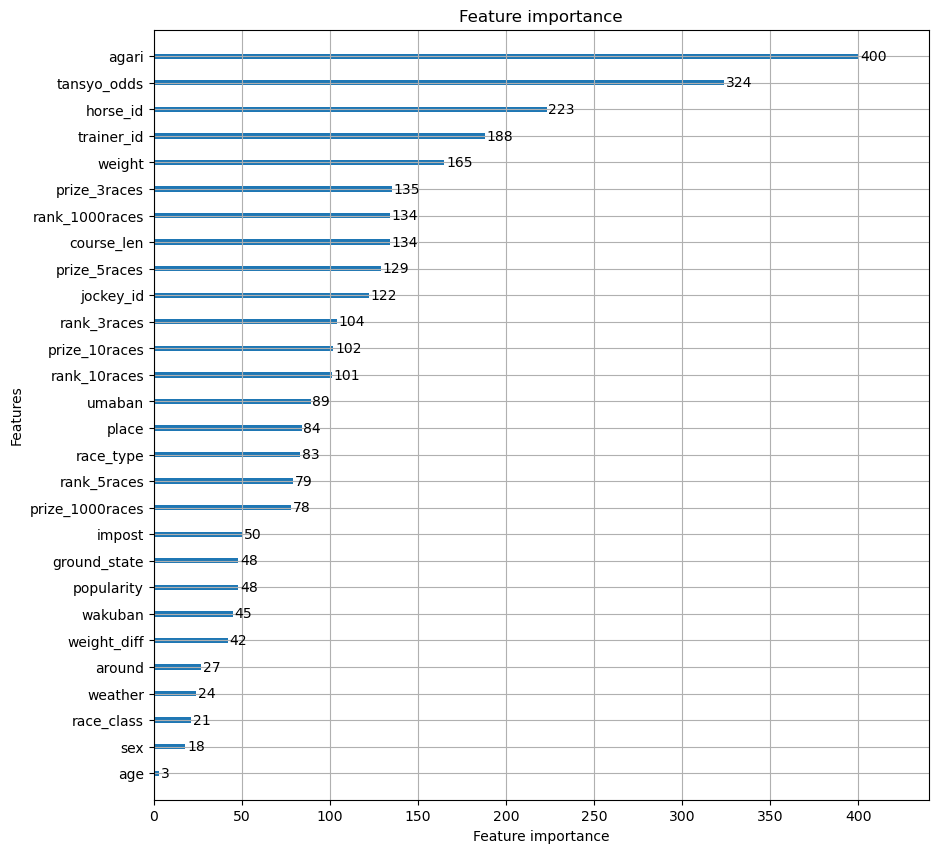

In [92]:
lgb.plot_importance(model,figsize=(10,10))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

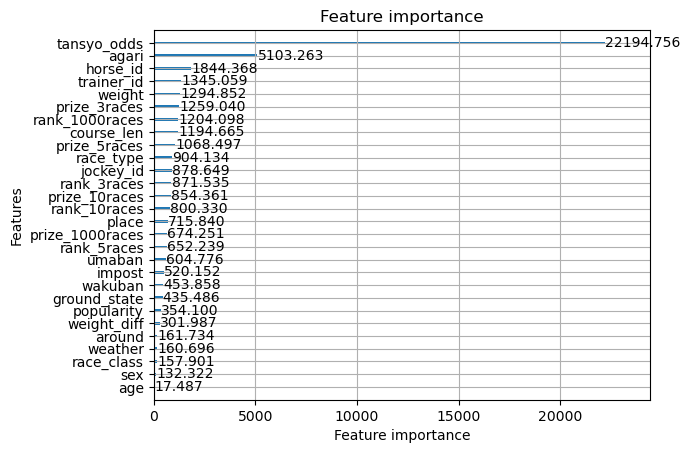

In [93]:
lgb.plot_importance(model,importance_type="gain")

##9
機械学習モデルによって、単勝馬券を予測してみる

In [1]:
from train import Trainer, create_yaml

In [7]:
create_yaml()
r=Trainer()
evaluation_df=r.run(test_start_date="2023-10-01")

NameError: name 'create_yaml' is not defined

In [7]:
from feature_engineering  import  PredictionFeatureCreator
r=PredictionFeatureCreator()

In [8]:
import pandas as pd
from urllib.request import urlopen,Request

In [9]:
url = f"https://race.netkeiba.com/race/result.html?race_id=202506010305"
headers = {"User-Agent": "Mozilla/5.0"}
request = Request(url, headers=headers)
html = urlopen(request).read()
rei=pd.read_html(html)
rei[0]

,着 順,枠,馬 番,馬名,性齢,斤量,騎手,タイム,着差,人 気,単勝 オッズ,後3F,コーナー 通過順,厩舎,馬体重 (増減)
0,1,6,12,エナジーショット,牝3,54.0,☆横山琉,2:04.1,NaN,9,43.4,35.8,3-3-4-3,美浦矢嶋,420(0)
1,2,3,6,ミサトレッドダイヤ,牝3,52.0,▲石神道,2:04.2,1/2,15,207.4,35.6,6-6-10-9,美浦高橋文,458(0)
2,3,1,1,ラムコーク,牝3,55.0,戸崎圭,2:04.2,クビ,1,1.9,36.0,4-3-4-3,美浦田中博,420(0)
3,4,4,8,ブライトゲイザー,牡3,57.0,津村,2:04.5,1.1/2,6,20.6,36.0,6-6-8-8,美浦宗像,486(0)
4,5,6,11,ジーティーワラワラ,牡3,57.0,野中,2:04.5,アタマ,17,271.9,36.4,9-9-2-3,美浦伊藤伸,438(0)
5,6,1,2,ビゾー,牡3,57.0,菅原明,2:04.6,クビ,2,4.6,35.9,10-10-11-9,栗東斉藤崇,464(0)
6,7,5,9,ウインイルネージュ,牝3,55.0,丹内,2:04.6,クビ,11,63.3,35.7,15-15-12-14,美浦和田郎,430(0)
7,8,8,16,レイホーキング,牡3,57.0,丸田,2:04.6,ハナ,12,66.0,35.7,13-12-12-12,美浦奥村武,456(0)
8,9,2,3,ハルノート,牡3,57.0,菊沢,2:04.7,1/2,14,132.8,36.2,8-6-8-6,美浦小手川,468(0)
9,10,7,13,カリータフェリス,牝3,55.0,木幡巧,2:04.7,アタマ,5,15.2,36.6,2-2-2-2,美浦鈴木慎,428(0)


In [10]:
r.fetch_syutuba_table_html("202506010411")


In [11]:
r.html

b'<!DOCTYPE html>\n<html>\n<head>\n<meta charset="EUC-JP">\n\n<!-- block=common__meta_tag_each_race (cp) -->\n<meta http-equiv="content-language" content="ja">\n<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n<meta name="viewport" content="width=1000">\n<meta name="format-detection" content="telephone=no" />\n<meta name="description" content="2025\xc7\xaf1\xb7\xee12\xc6\xfc \xc3\xe6\xbb\xb311R \xa5\xd5\xa5\xa7\xa5\xa2\xa5\xea\xa1\xbc\xa3\xd3(G3)\xa4\xce\xbd\xd0\xc7\xcf\xc9\xbd\xa4\xc7\xa4\xb9\xa1\xa3JRA\xb3\xab\xba\xc5\xa5\xec\xa1\xbc\xa5\xb9\xa4\xce\xbd\xd0\xc7\xcf\xc9\xbd\xa4\xe4\xba\xc7\xbf\xb7\xa5\xaa\xa5\xc3\xa5\xba\xa1\xa2\xa5\xec\xa1\xbc\xa5\xb9\xb7\xeb\xb2\xcc\xc2\xae\xca\xf3\xa1\xa2\xca\xa7\xcc\xe1\xbe\xf0\xca\xf3\xa4\xf2\xa4\xcf\xa4\xb8\xa4\xe1\xa1\xa2\xb6\xa5\xc7\xcf\xcd\xbd\xc1\xdb\xa4\xe4\xa5\xc7\xa1\xbc\xa5\xbf\xca\xac\xc0\xcf\xa4\xca\xa4\xc9\xcd\xbd\xc1\xdb\xa4\xcb\xcc\xf2\xce\xa9\xa4\xc4\xbe\xf0\xca\xf3\xa4\xe2\xcb\xfe\xba\xdc\xa4\xc7\xa4\xb9\xa1\xa3" />\n<meta 

In [12]:
df = pd.read_html(r.html) # htmlからレース結果テーブルを抽出
df[0]

枠 馬 番   印         馬名  性齢    斤量     騎手     厩舎  馬体重 (増減) Unnamed: 9_level_0  \
    枠 馬 番   印         馬名  性齢    斤量     騎手     厩舎  馬体重 (増減) Unnamed: 9_level_1   
0   1   1 NaN  マイスターヴェルク  牝3  55.0  マーカンド   美浦勢司   498(+8)              ---.-   
1   1   2 NaN    キタノクニカラ  牝3  55.0     丸田   美浦小島    388(0)              ---.-   
2   2   3 NaN    ジャルディニエ  牝3  55.0     斎藤  栗東奥村豊  438(-12)              ---.-   
3   2   4 NaN   ネーブルオレンジ  牝3  55.0     丹内  栗東杉山佳   466(+2)              ---.-   
4   3   5 NaN    ハードワーカー  牝3  55.0    佐々木   美浦竹内   484(+8)              ---.-   
5   3   6 NaN    ミーントゥビー  牝3  55.0     松岡   美浦堀内   444(+2)              ---.-   
6   4   7 NaN    ホウオウガイア  牝3  55.0     田辺   美浦大竹  436(+12)              ---.-   
7   4   8 NaN      レイユール  牝3  55.0     嶋田   美浦手塚    416(0)              ---.-   
8   5   9 NaN  モルティフレーバー  牝3  55.0    北村宏  栗東清水久  454(+12)              ---.-   
9   5  10 NaN  ルージュミレネール  牝3  55.0    横山和  美浦斎藤誠   442(-2)              ---.-   
10  6  11 NaN    エストゥペンダ  牝3  55.0     三浦  美浦高柳瑞   442(+4)              ---.-   
11  6  12 NaN  エリカエクスプレス  牝3  55.0    戸崎圭  栗東杉山晴    456(0)              ---.-   
12  7  13 NaN     ティラトーレ  牝3  55.0    木幡巧    美浦牧   488(+2)              ---.-   
13  7  14 NaN   ニシノラヴァンダ  牝3  55.0    菅原明   美浦奥平  432(+12)              ---.-   
14  8  15 NaN  ミラーダカリエンテ  牝3  55.0     石川   美浦相沢   472(-2)              ---.-   
15  8  16 NaN     レモンバーム  牝3  55.0     団野   美浦嘉藤   448(-4)              ---.-   

    人気 お気に入り馬      馬メモ切替  
    人気     登録 グループ 馬メモ切替  
0   **    NaN  NaN    編集  
1   **    NaN  NaN    編集  
2   **    NaN  NaN    編集  
3   **    NaN  NaN    編集  
4   **    NaN  NaN    編集  
5   **    NaN  NaN    編集  
6   **    NaN  NaN    編集  
7   **    NaN  NaN    編集  
8   **    NaN  NaN    編集  
9   **    NaN  NaN    編集  
10  **    NaN  NaN    編集  
11  **    NaN  NaN    編集  
12  **    NaN  NaN    編集  
13  **    NaN  NaN    編集  
14  **    NaN  NaN    編集  
15  **    NaN  NaN    編集

In [6]:
r.fetch_results()

KeyError: '日付'

## 予測時の処理

## レース前日準備

In [1]:
import preprocessing

horse_results_preprocessed=preprocessing.process_horse_results(
    save_filename="horse_results_prediction.csv"
)

In [2]:
horse_results_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 3588
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   horse_id      3557 non-null   int64         
 1   date          3557 non-null   datetime64[ns]
 2   rank          3557 non-null   int64         
 3   prize         3557 non-null   float64       
 4   rank_diff     3557 non-null   float64       
 5   weather       3557 non-null   int64         
 6   race_type     3557 non-null   int64         
 7   course_len    3557 non-null   int64         
 8   ground_state  3557 non-null   int64         
 9   agari         3557 non-null   float64       
 10  race_class    3243 non-null   float64       
 11  n_horses      3557 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 361.3 KB


## 予測当日の処理

In [4]:
from feature_engineering import PredictionFeatureCreator

In [5]:
pfc=PredictionFeatureCreator()
pfc.agg_horse_n_races()

KeyError: 'race_id'

In [1]:
pfc.agg_horse_n_races_df

NameError: name 'pfc' is not defined

In [2]:
features=pfc.create_features(
    race_id="202506010411",
    skip_agg_horse=True
)

NameError: name 'pfc' is not defined

In [ ]:
pfc.results

In [ ]:
import prediction

In [ ]:
prediction.predict(features)